In [1]:
import matplotlib.pyplot as plt
import numpy as np
from SocialNetwork.social_network_environment import *
from SocialNetwork.cascade import *
from Advertising.enviroment.bid import *
from Advertising.enviroment.VCG import *
from Advertising.learners.Greedy_algorithm import *
from Advertising.learners.GTS_Learner import *
from Advertising.learners.GTS_SW_Learner import *
from Advertising.learners.TS_no_qualities import *
from Advertising.learners.TS_no_anything import *

from tqdm.autonotebook import tqdm
from Advertising.learners.TS_sliding_window import *
import itertools
seed = 6789
random.seed(seed)
only_first = False


lambdas = [0.5, 0.42, 0.38, 0.30, 0.2, 0.05]
social_network = social_network_environment()
social_network.init_from_json(
    json_path_network='Config/network.json', json_path_features='Config/features.json')




with open("Config/estimated_influence.json", "r"):
    data = json.load(open("Config/estimated_influence.json"))

active_by_influence_reward = np.array(data.get("estimated_influence"))


In [2]:
def create_adv_bids():

    adversary_bids = []
    for _ in range(0, 10): 
        adversary_i_bids = []
        for _ in range(0, 5):
            adversary_i_bids.append(random.randint(0, 4))
        adversary_bids.append(adversary_i_bids)
    return adversary_bids

In [3]:
variance = 10
expected_values = []
expected_values2 = []
sw_size = 2000
interval = 5000
n_experiments=15000
n_change = (int)(n_experiments/interval)
list_of_bids = []


arms = arms_creation(seed=30291, number_of_arms=20)

for l in range(1, n_change):
    list_of_bids.append(create_adv_bids())

## we simulate a ts for the clairvoyant, as much as the change in adversary biddings
ts_l = [] 
best_arm_indexes = []
expected_values_list = []
for r in range(0, n_change-1):
    ts_l.append(GTS_Learner(20, arms, variance=variance,ad_id=1))
    _, best_arm_index, _, expected_values, _ = ts(ts_l[r], arms, list_of_bids[r], only_first, n_experiments, lambdas, social_network)
    best_arm_indexes.append(best_arm_index)
    expected_values_list.append(expected_values)






ts_learner = GTS_SW_Learner(20, arms, variance=variance, size_SW=sw_size, ad_id=1)
#ts_learner2 = GTS_SW_Learner(20, arms, variance=variance, size_SW=sw_size, ad_id=1)


for j in range(0, 1):
    print("This is TS number " + str(j))

    best_arm, best_arm_index, number_of_pulls, expected_values, thing_to_plot= test_sw(ts_learner, arms, list_of_bids, only_first, n_experiments, lambdas, social_network, sw_size)
    # best_arm2, best_arm_index2, number_of_pulls2, expected_values2, thing_to_plot2= test_sw(
    #     ts_learner2, arms, list_of_bids, not only_first, n_experiments, lambdas, social_network, sw_size)


TypeError: ts() missing 1 required positional argument: 'social_network'

THE BEST ARM FOR EXPERIMENT TOTAL IS: [3 1 2 2 3] INDEX 18
THE BEST ARM FOR EXPERIMENT ONLY FIRST IS: [3 4 3 3 0] INDEX 19


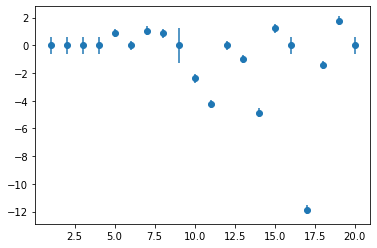

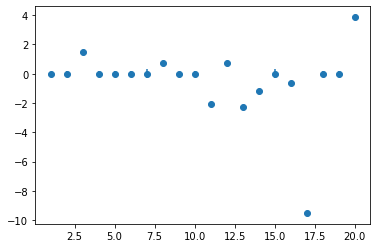

[[1 1 2 0 4]
 [3 1 2 2 3]]
[1.8722085157182633, 1.7822165542615678]
[[3 3 4 2 3]
 [3 4 3 3 0]]
[2.846000000000002, 3.849999999999998]


In [ ]:

print("THE BEST ARM FOR EXPERIMENT ONLY FIRST IS:",
      arms[best_arm_index], "INDEX", best_arm_index)
# print("THE BEST ARM FOR EXPERIMENT total IS:",
#       arms[best_arm_index2], "INDEX", best_arm_index2)

array = [i+1 for i in range(0, 20)]


plt.figure(1)
plt.errorbar(array, expected_values, yerr=(1/ts_learner.tau0), fmt='o')
# plt.figure(0)
# plt.errorbar(array, expected_values2, yerr=(1/ts_learner2.tau0), fmt='o')

plt.show()




In [ ]:
# best_values = []
# j = 0
# k = 0
# for i in range(n_experiments):
#     k += 1
#     best_values.append(clair_ex[j])
#     if k == sw_size:
#         k = 0
#         j += 1

# regret_no_qualities = [
#     best_values[x] - thing_to_plot[x] for x in range(len(thing_to_plot))]

## Here i calculate the clairvoyant running the algorithm in a static enviroment as much as the times i vary the adversarial bids




plt.figure(0)
plt.plot(thing_to_plot, 'y')
plt.ylabel("Reward")
plt.xlabel("Rounds")
plt.plot(best_values, 'r')
plt.legend(["Clairvoyant", "TS"])

plt.figure(1)
plt.ylabel("Regret")
plt.xlabel("Rounds")
plt.plot(regret_no_qualities, 'g')


IndexError: list index out of range

In [ ]:
print("Here are reward and regret for the case without ad qualities, with only ads in first position")
best_values2 = []
j = 0
k = 0
for i in range(n_experiments):
    k += 1
    best_values2.append(clair_ex2[j])
    if k == sw_size:
        k = 0
        j += 1

regret_no_qualities2 = [
    best_values2[x] - thing_to_plot2[x] for x in range(len(thing_to_plot2))]
plt.figure(0)
plt.plot(best_values2, 'r')
plt.plot(thing_to_plot2, 'y')
plt.ylabel("Reward")
plt.xlabel("Rounds")
plt.legend(["Clairvoyant", "TS"])

plt.figure(1)
plt.ylabel("Regret")
plt.xlabel("Rounds")
plt.plot(regret_no_qualities2, 'g')


Here are reward and regret for the case without ad qualities, with only ads in first position


IndexError: list index out of range